## Data Analysis for Audio Annotations

This Jupyter Notebook performs a data analysis on the `audio_annotations.csv` dataset. The dataset includes information about audio files, recorders, dates, times, audio durations, start and end times, and species.

### Visualizations Included

1. **Number of Audio Files by Recorder**: A bar chart showing the distribution of audio files among different recorders.

2. **Frequency of Species**: A bar chart displaying the frequency of each species in the dataset.

3. **Distribution of Audio Durations**: A histogram illustrating the distribution of audio durations.

4. **Time of Recordings**: A line chart showing the number of audio files recorded at different times of the day.

5. **Date of Recordings**: A line chart indicating the number of audio files recorded on different dates.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re # case sensitive

In [12]:
!ls ../../Data

 Annotations   Dataset	'Species List'


In [13]:
ROOT_PATH = "../../" #"../../../desarrollo/"

input_file = ROOT_PATH + "Data/Dataset/CSVs/" + "dataset.csv"

In [14]:
# Read the CSV file
df = pd.read_csv(input_file)

In [15]:
# Number of rows of df
print("Number of annotations: ", len(df))

Number of annotations:  3749


In [16]:
print("Number of unique paths: ", len(df["path"].unique()))

Number of unique paths:  461


In [17]:
df

,path,annotator,recorder,date,time,audio_duration,start_time,end_time,low_frequency,high_frequency,specie,bbox
0,AM1/2023_05_10/AM1_20230510_060000.WAV,Edu,AM1,2023/05/10,06:00:00,00:01:00,12.488571,13.105714,3003.168457,5366.754395,Galerida theklae,"[19, 0.2129032258064516, 0.20010527406349365, ..."
1,AM1/2023_05_10/AM1_20230510_060000.WAV,Edu,AM1,2023/05/10,06:00:00,00:01:00,5.914286,6.925714,1881.718994,3449.984619,Cyanopica cooki,"[13, 0.1064516129032258, 0.2439350565089254, 0..."
2,AM1/2023_05_10/AM1_20230510_060000.WAV,Edu,AM1,2023/05/10,06:00:00,00:01:00,41.194286,41.734286,2604.460205,3502.845947,Cyanopica cooki,"[13, 0.6903225806451613, 0.2275352877017647, 0..."
3,AM1/2023_05_10/AM1_20230510_060000.WAV,Edu,AM1,2023/05/10,06:00:00,00:01:00,11.331429,12.394286,1801.304199,3502.845947,Cyanopica cooki,"[13, 0.19731182795698926, 0.24530724483567576,..."
4,AM1/2023_05_10/AM1_20230510_060000.WAV,Edu,AM1,2023/05/10,06:00:00,00:01:00,30.548571,32.537143,2820.347168,5601.550781,Galerida theklae,"[19, 0.5252688172043011, 0.20106867887207103, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3744,AM8/2023_05_30/AM8_20230530_110000.WAV,Giulia,AM8,2023/05/30,11:00:00,00:01:00,15.326958,19.618950,7534.428564,16000.000000,Carduelis carduelis,"[5, 0.2908602150537634, 0.1031186152388285, 0...."
3745,AM8/2023_05_30/AM8_20230530_110000.WAV,Giulia,AM8,2023/05/30,11:00:00,00:01:00,10.070100,11.012785,10045.170898,15652.996094,Carduelis carduelis,"[5, 0.17526881720430107, 0.09031277026379966, ..."
3746,AM8/2023_05_30/AM8_20230530_110000.WAV,Giulia,AM8,2023/05/30,11:00:00,00:01:00,14.339911,16.039736,1607.101094,3234.563699,Luscinia megarhynchos,"[23, 0.25268817204301075, 0.2546464671244051, ..."
3747,AM8/2023_05_30/AM8_20230530_110000.WAV,Giulia,AM8,2023/05/30,11:00:00,00:01:00,48.498399,51.803344,11486.522738,14348.650436,Carduelis carduelis,"[5, 0.8349462365591398, 0.08804371979449326, 0..."


## Number of Audio Files by Recorder

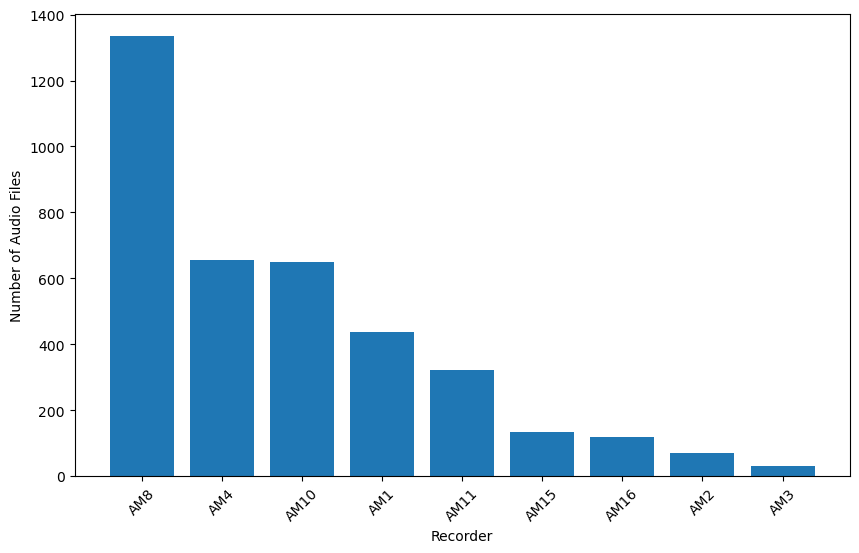

In [19]:
# Count the number of audio files by recorder
recorder_counts = df['recorder'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(recorder_counts.index, recorder_counts.values)
plt.xlabel('Recorder')
plt.ylabel('Number of Audio Files')
# plt.title('Number of Audio Files by Recorder')
plt.xticks(rotation=45)

# save as pdf
plt.savefig(ROOT_PATH + "Figures/recorder_counts.pdf")

plt.show()

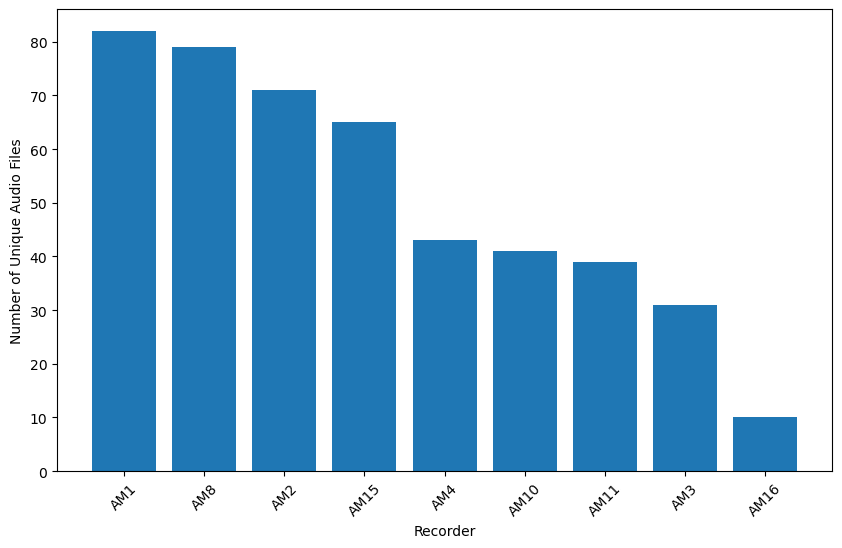

In [20]:
# Show the number of unique audio files by recorder in a plot
recorder_counts = df.groupby('recorder')['path'].nunique()

# Order the recorders by the number of unique audio files
recorder_counts = recorder_counts.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(recorder_counts.index, recorder_counts.values)
plt.xlabel('Recorder')
plt.ylabel('Number of Unique Audio Files')
# plt.title('Number of Unique Audio Files by Recorder')
plt.xticks(rotation=45)

# save as pdf
plt.savefig(ROOT_PATH + "Figures/recorder_unique_counts.pdf")

plt.show()


In [ ]:
# Print a list of all specie unique values
print("Number of unique species: ", df["specie"].unique())

Number of unique species:  ['Galerida theklae' 'Cyanopica cooki' 'Curruca melanocephala' 'No audio'
 'Curruca' 'Curruca undata' 'Carduelis carduelis' 'Bird' 'Sylvia'
 'Turdus merula' 'Chloris chloris' 'Alaudidae' 'Calandrella brachydactyla'
 'Parus major' 'Cisticola juncidis' 'Emberiza calandra' 'Sturnus unicolor'
 'Merops apiaster' 'Passer' 'Milvus migrans' 'Luscinia megarhynchos'
 'Fringilla' 'Saxicola rubicola' 'Motacilla flava' 'Ciconia ciconia'
 'Upupa epops' 'Pica pica' 'Sturnus' 'Cettia cetti' 'Anthus pratensis'
 'Hippolais polyglotta' 'Linaria Cannabina' 'Galerida Cristata'
 'Melanocorypha calandra' 'Lanius' 'Serinus serinus' 'Falco tinnunculus'
 'Streptopelia decaocto']


## Frequency of species

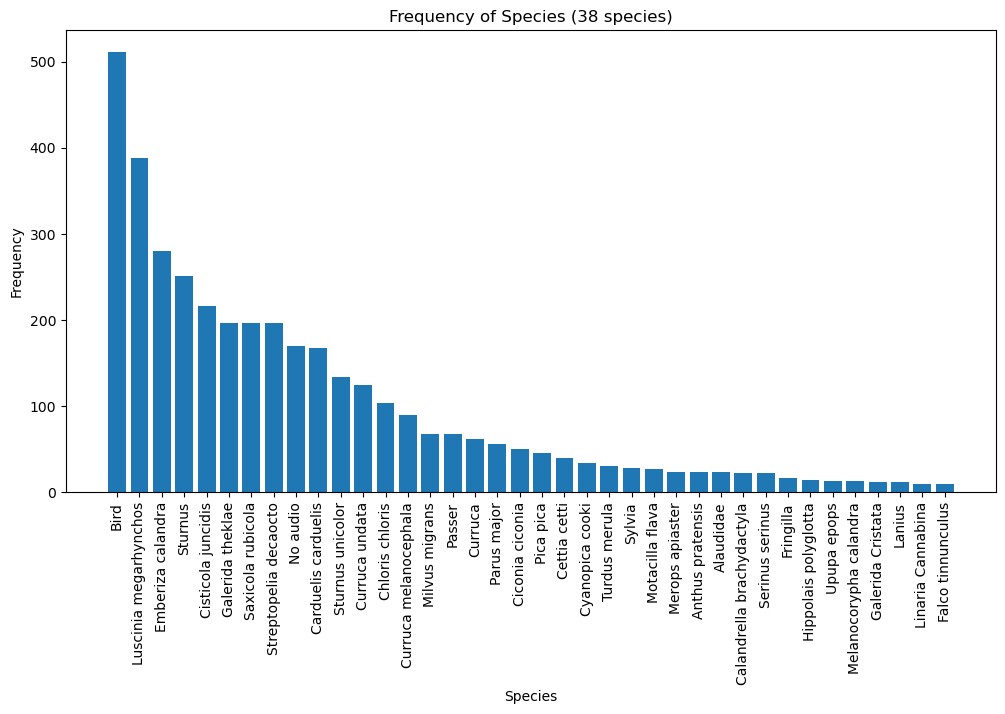

In [ ]:
# Count the frequency of each species
species_counts = df['specie'].value_counts()

num_species = len(species_counts.index)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Frequency of Species (' + str(num_species) + ' species)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# change specie from df where Specie is Sturnus unicolor tu Sturnus
df['specie'] = df['specie'].replace('Sturnus unicolor', 'Sturnus')

/tmp/ipykernel_3409390/2402503617.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, rotation=90)


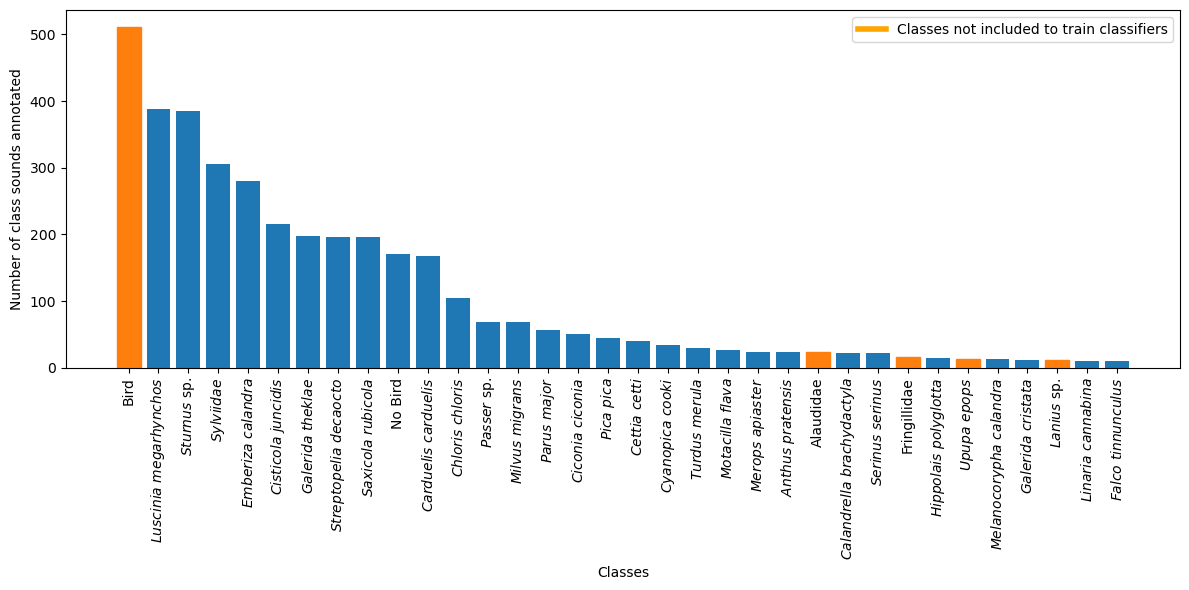

In [12]:
import matplotlib.pyplot as plt

# Función para transformar los nombres de las especies
def transform_species_name(specie):
    if specie == "Bird":
        return specie
    elif specie == "No audio":
        return "No Bird"
    # Si Galerida cristata, se transforma a Galerida Cristata
    elif specie == "Galerida Cristata":
        return "Galerida cristata"
    # Si Linnaria cannabina, se transforma a Linaria Cannabina
    elif specie == "Linaria Cannabina":
        return "Linaria cannabina"
    elif specie == "Sylvia": #  or specie == "Curruca"
        return "Sylviidae"
    elif specie == "Fringilla":
        return "Fringillidae"
    elif specie == "Alaudidae":
        return "Alaudidae"
    elif specie == "Curruca":
        return "Sylviidae"
    elif specie == "Curruca melanocephala" or specie == "Curruca undata":
        return "Sylviidae"
    elif len(specie.split()) == 2:
        return specie  # Se manejará la cursiva en el gráfico
    else:
        return f"{specie} sp."  # Se manejará la cursiva en el gráfico

# Aplicar la transformación a los nombres de las especies
df['transformed_specie'] = df['specie'].apply(transform_species_name)

# Contar la frecuencia de cada especie transformada
species_counts = df['transformed_specie'].value_counts()

num_species = len(species_counts.index)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(species_counts.index, species_counts.values)
plt.xlabel('Classes')
plt.ylabel('Number of class sounds annotated')
# plt.title('Frequency of Species (' + str(num_species) + ' species)')
plt.xticks(rotation=45)

# Personalizar las etiquetas del eje X para ponerlas en cursiva (sin "sp")
ax = plt.gca()
xticklabels = []
for label in ax.get_xticklabels():
    text = label.get_text()
    if text != "Bird" and text != "No Bird" and text != "Fringillidae" and text != "Alaudidae":
        # Separar el nombre de la especie y el "sp" (si lo tiene)
        if " sp." in text:
            name_part = text.replace(' sp.', '')  # Nombre de la especie
            text = rf"$\mathit{{{name_part}}}$ sp."  # Nombre en cursiva, sp sin cursiva
        else:
            # Nombre normal en cursiva
            text = text.replace(' ', r'\ ')
            text = rf"$\mathit{{{text}}}$"
    xticklabels.append(text)

# Actualizar las etiquetas del eje X
ax.set_xticklabels(xticklabels, rotation=90)

# Cambiar el color de las barras específicas a naranja
for bar, label in zip(bars, species_counts.index):
    if label in ['Fringillidae', 'Curruca', 'Alaudidae', 'Upupa epops', 'Bird', 'Lanius sp.']:
        bar.set_color('C1')

# Añadir la leyenda
orange_patch = plt.Line2D([0], [0], color='orange', lw=4, label='Classes not included to train classifiers')
plt.legend(handles=[orange_patch])

plt.tight_layout()

# Save the plot as a PDF in the Figures folder
plt.savefig(ROOT_PATH + 'Figures/species_frequency.pdf', format='pdf')

plt.show()


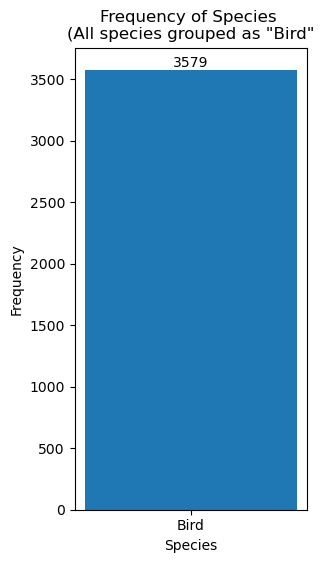

In [40]:
# Filtra el DataFrame para excluir las instancias donde la especie es "No audio"
filtered_df = df[df['specie'] != 'No audio']

# Suma total de todas las especies después de filtrar
total_species_count = filtered_df['specie'].value_counts().sum()

# Crea un gráfico de barras con una sola barra
plt.figure(figsize=(3, 6))
bar = plt.bar('Bird', total_species_count)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Frequency of Species \n(All species grouped as "Bird"')

# Coloca el número de conteos sobre la barra
plt.text(bar[0].get_x() + bar[0].get_width() / 2, bar[0].get_height(), str(total_species_count), 
         ha='center', va='bottom')

plt.show()

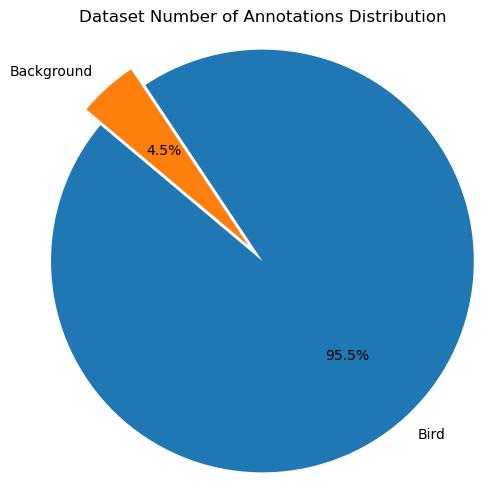

In [41]:
import matplotlib.pyplot as plt

# Calcula el conteo de "No audio"
no_audio_count = df[df['specie'] == 'No audio']['specie'].count()

# Utiliza el total_species_count calculado previamente para las especies distintas de "No audio"
# Asegúrate de que total_species_count ya ha sido calculado como se muestra en el fragmento anterior

# Crea un gráfico de pastel
labels = ['Bird', 'Background']
sizes = [total_species_count, no_audio_count]
explode = (0.1, 0)  # Resalta la primera rebanada si lo deseas

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Dataset Number of Annotations Distribution')
plt.axis('equal')  # Asegura que el pastel se dibuje como un círculo

# Hacer el fondo transparente
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.show()

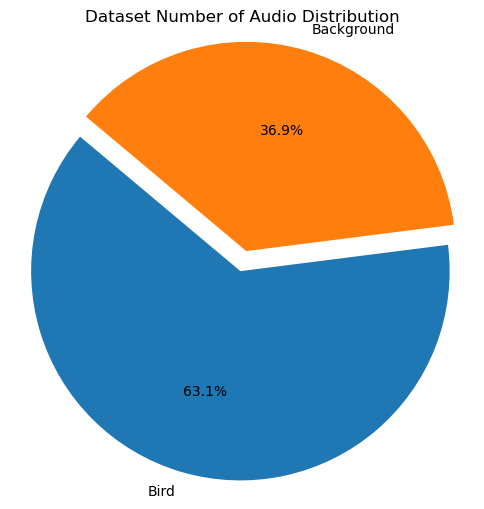

In [43]:
import matplotlib.pyplot as plt

# Calcula el conteo de "No audio"
no_audio_count = df[df['specie'] == 'No audio']['specie'].count()

# Utiliza el total_species_count calculado previamente para las especies distintas de "No audio"
# Asegúrate de que total_species_count ya ha sido calculado como se muestra en el fragmento anterior

# Suma total de todas las especies después de filtrar
total_species_count = df[df['specie'] != 'No audio']['path'].nunique()

# Crea un gráfico de pastel
labels = ['Bird', 'Background']
sizes = [total_species_count, no_audio_count]
explode = (0.1, 0)  # Resalta la primera rebanada si lo deseas

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Dataset Number of Audio Distribution')
plt.axis('equal')  # Asegura que el pastel se dibuje como un círculo

# Hacer el fondo transparente
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

plt.show()

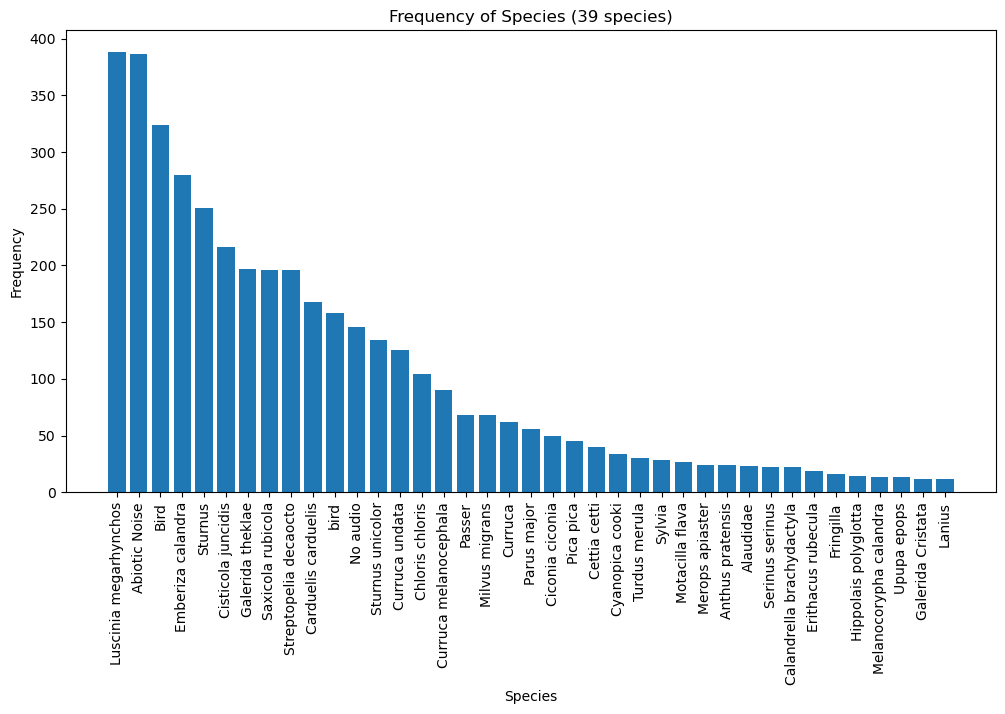

In [13]:
# Show species where the frequency is less than 10
species_counts_non_Unknown = df[~(df['specie'].str.contains('unknown', na=False, case = False))]['specie'].value_counts()

num_species = len(species_counts_non_Unknown.index)

species_counts_low = species_counts_non_Unknown[species_counts_non_Unknown > 10]

num_species = len(species_counts_low.index)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(species_counts_low.index, species_counts_low.values)
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Frequency of Species (' + str(num_species) + ' species)')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Print count of each specie
print(species_counts_non_Unknown)

specie
Luscinia megarhynchos        388
Abiotic Noise                386
Bird                         324
Emberiza calandra            280
Sturnus                      251
Cisticola juncidis           216
Galerida theklae             197
Saxicola rubicola            196
Streptopelia decaocto        196
Carduelis carduelis          168
bird                         158
No audio                     146
Sturnus unicolor             134
Curruca undata               125
Chloris chloris              104
Curruca melanocephala         90
Passer                        68
Milvus migrans                68
Curruca                       62
Parus major                   56
Ciconia ciconia               50
Pica pica                     45
Cettia cetti                  40
Cyanopica cooki               34
Turdus merula                 30
Sylvia                        28
Motacilla flava               27
Merops apiaster               24
Anthus pratensis              24
Alaudidae                     23
Ser

## Distribution of Audio Duration

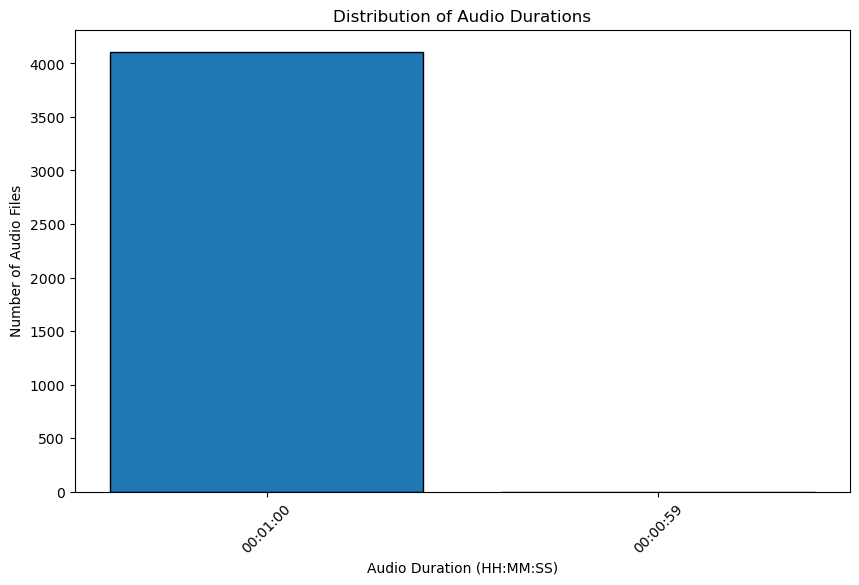

In [15]:
audio_duration_count = df['audio_duration'].value_counts()

# Plot a histogram of audio durations
plt.figure(figsize=(10, 6))
plt.bar(audio_duration_count.index, audio_duration_count.values, edgecolor='k')
plt.xlabel('Audio Duration (HH:MM:SS)')
plt.ylabel('Number of Audio Files')
plt.title('Distribution of Audio Durations')
plt.xticks(rotation=45)
plt.show()

## Time of recordings

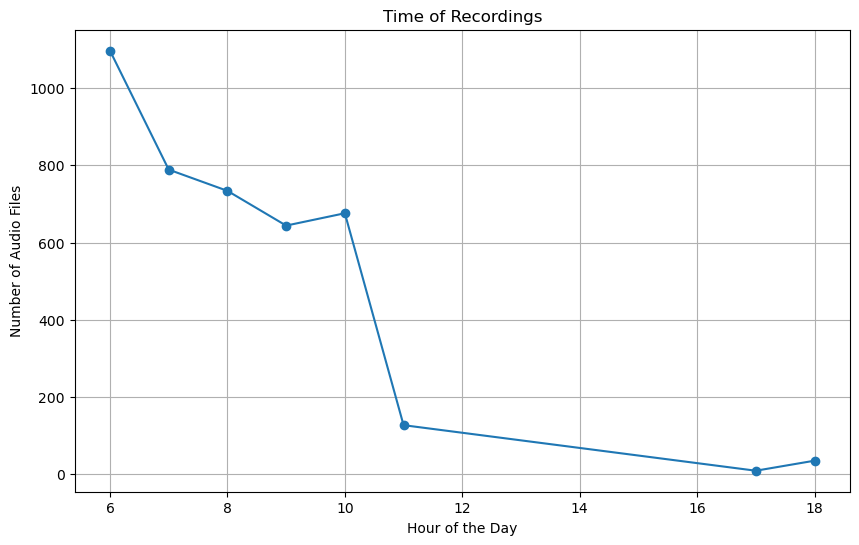

In [16]:
# Convert 'time' to a datetime object
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')

# Extract the hour of the day
df['hour'] = df['time'].dt.hour

# Count the number of audio files recorded at each hour
time_counts = df['hour'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(time_counts.index, time_counts.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Audio Files')
plt.title('Time of Recordings')
plt.grid(True)
plt.show()

## Date of recordings

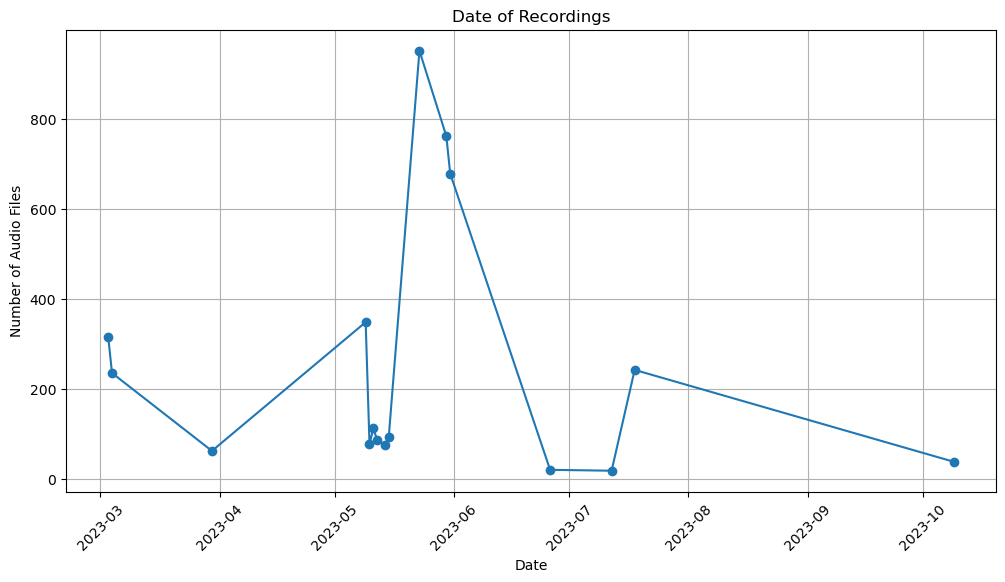

In [17]:
# Convert 'date' to a datetime object
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

# Extract the date without time
df['date_only'] = df['date'].dt.date

# Count the number of audio files recorded on each date
date_counts = df['date_only'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Audio Files')
plt.title('Date of Recordings')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


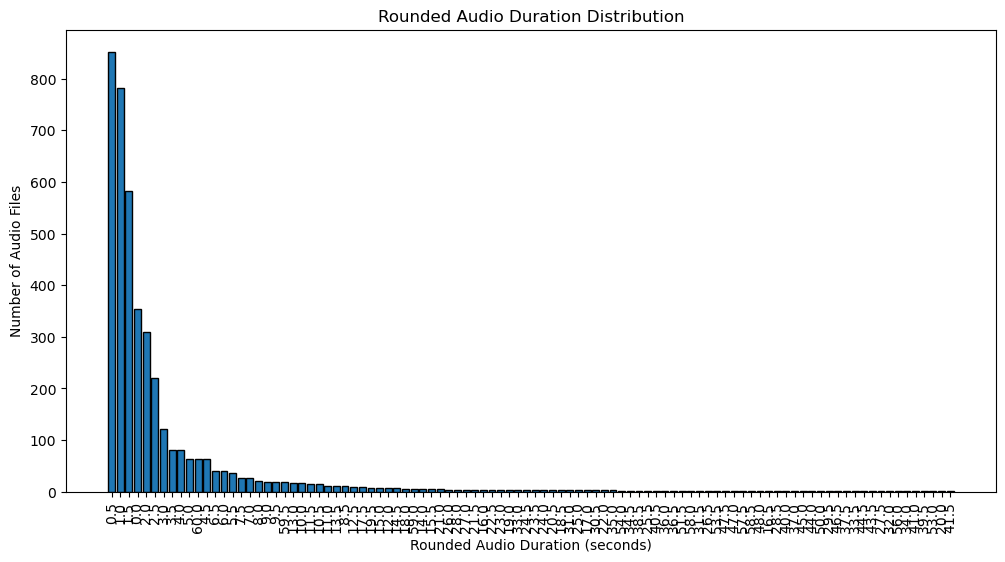

In [18]:
# Calculate the duration of each audio
df['duration'] = df['end_time'] - df['start_time']

# Round the duration to the nearest multiple of 0.5 seconds
df['rounded_duration'] = df['duration'].apply(lambda x: round(x * 2) / 2).astype(str)

# Count the occurrences of each rounded duration
duration_counts = df['rounded_duration'].value_counts()#.sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(duration_counts.index, duration_counts.values, edgecolor = "k")
plt.xlabel('Rounded Audio Duration (seconds)')
plt.ylabel('Number of Audio Files')
plt.title('Rounded Audio Duration Distribution')
plt.xticks(rotation=90)
plt.show()

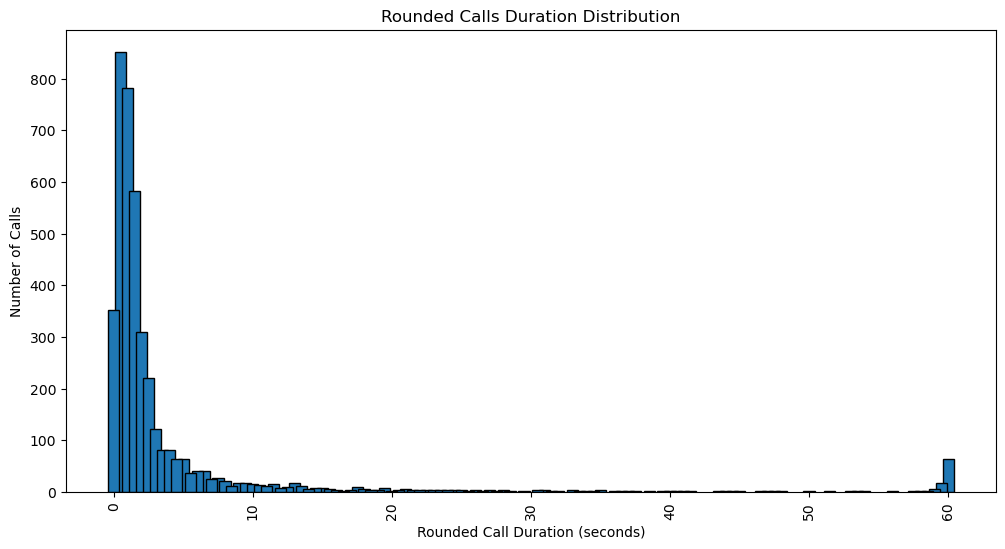

In [19]:
# Calculate the duration of each audio
df['duration'] = df['end_time'] - df['start_time']

# Round the duration to the nearest multiple of 0.5 seconds
df['rounded_duration'] = df['duration'].apply(lambda x: (round(x * 2) / 2))#.astype(str)

# Count the occurrences of each rounded duration
duration_counts = df['rounded_duration'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(duration_counts.index, duration_counts.values, edgecolor="k")
plt.xlabel('Rounded Call Duration (seconds)')
plt.ylabel('Number of Calls')
plt.title('Rounded Calls Duration Distribution')
plt.xticks(rotation=90)
plt.show()
